<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_00_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING CALOORIES BURNED

## RMSLE Metric and Competition Context

This notebook is developed for a data science competition focused on predicting **Calories burned** during exercise. The evaluation metric for this competition is the **Root Mean Squared Logarithmic Error (RMSLE)**, which measures the square root of the mean squared difference between the logarithms of predicted and actual values. RMSLE is ideal for datasets with a wide range of target values, as it emphasizes **relative errors**, ensuring balanced performance across small and large calorie values.

The RMSLE formula is:

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*AUzyQ1rc6mpQVYfn)

### Why RMSLE?
- **Handles Wide Ranges**: RMSLE penalizes relative errors proportionally, making it robust for calorie values ranging from small (e.g., 10 calories) to large (e.g., 1000 calories).
- **Balanced Evaluation**: Ensures models perform well across the entire spectrum of calorie burn.
- **Competition Goal**: A lower RMSLE score indicates a precise and generalizable model, critical for ranking high on the leaderboard.

---

## Potential Effects of Features on Calorie Burn

The dataset includes the following features to predict calorie burn: **Sex**, **Age**, **Height**, **Weight**, **Duration**, **Heart_Rate**, and **Body_Temp**. Below, we explore how each feature might influence calorie burn:

### 1. Sex
- **Impact**: Differences in metabolic rates and muscle mass between males and females affect calorie burn. Males often have higher muscle mass, leading to greater calorie expenditure for the same exercise.
- **Example**: A male running at the same pace and duration as a female may burn more calories due to higher energy demands.

### 2. Age
- **Impact**: Basal metabolic rate (BMR) decreases with age, reducing calorie burn in older individuals due to lower metabolic rates and muscle mass (sarcopenia).
- **Example**: A 20-year-old may burn more calories than a 50-year-old during identical workouts.

### 3. Height
- **Impact**: Taller individuals have more body mass or muscle, requiring more energy for movement, thus burning more calories. Height’s effect is often linked to weight and exercise intensity.
- **Example**: A taller person may expend more energy covering the same distance.

### 4. Weight
- **Impact**: Heavier individuals burn more calories due to the energy required to move greater body mass. Body composition (fat vs. muscle) also influences calorie burn.
- **Example**: A 90 kg individual burns more calories walking the same distance as a 60 kg individual.

### 5. Duration
- **Impact**: Longer exercise sessions directly increase total calorie expenditure, though intensity and exercise type also matter.
- **Example**: Running for 30 minutes burns more calories than running for 15 minutes.

### 6. Heart_Rate
- **Impact**: Higher heart rates indicate greater exercise intensity and metabolic effort, leading to increased calorie burn. Fitness levels can modulate heart rate responses.
- **Example**: High heart rate during a HIIT workout correlates with higher calorie burn.

### 7. Body_Temp
- **Impact**: Rising body temperature during exercise reflects increased metabolic activity and thermoregulation, potentially increasing calorie burn. Environmental factors (e.g., heat) also play a role.
- **Example**: Exercising in a hot environment may increase calorie expenditure due to thermoregulation.

---

## Transition to Analysis

Understanding the relationships between these features and calorie burn is key to building a predictive model. In this notebook, we will:

1. **Explore Data**: Analyze the distribution of the target variable (**Calories**) and features using visualizations (e.g., histograms, boxplots).
2. **Correlation Analysis**: Identify relationships between features and the target using correlation matrices and polar plots.
3. **Outlier Detection**: Address anomalies that could skew model performance.
4. **Feature Engineering**: Apply techniques like quantile and equal-width binning to enhance model input.
5. **Model Development**: Build and evaluate models to minimize RMSLE, aligning with competition objectives.

### Visualization Strategy
We will use:
- **Histograms** and **boxplots** to examine feature distributions.
- **Correlation matrices** to uncover feature relationships.
- **Polar plots** for creative visualization of feature impacts.
- **Pair plots** to explore pairwise relationships.

By systematically analyzing the data, we aim to develop a robust model that accurately predicts calorie burn and excels in the competition.

---

# 0.0 Setting

## 0.1 Import Libraries:

In [1]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.4

In [2]:
%%capture
#!pip install -qq pytorch_tabnet
!pip install optuna
!pip install --upgrade catboost
#!pip install optuna-integration-pytorch-tabnet

#from pytorch_tabnet.tab_model import TabNetRegressor

!pip install --upgrade category-encodersy
!pip install optuna-integration
!pip install colorama
#!pip install pyfiglet
#!pip install keras-tuner --upgrade
#!pip install keras-nlp
#!pip install BorutaShap
#!pip install scikit-learn==1.2.2
#!pip install scikit-lego
!pip install skops

In [3]:
import sklearn
import lightgbm, xgboost, catboost
sklearn.__version__, lightgbm.__version__, xgboost.__version__, catboost.__version__

('1.6.1', '4.5.0', '2.1.4', '1.2.8')

In [4]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
#import keras_tuner as kt
#from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
#import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

#from category_encoders.cat_boost import CatBoostEncoder
#from category_encoders.wrapper import PolynomialWrapper
#from category_encoders.count import CountEncoder
#from category_encoders import TargetEncoder

import skops.io as sio

warnings.filterwarnings('ignore')
#import pyfiglet
#plt.style.use('fivethirtyeight')

<Figure size 640x480 with 0 Axes>

**Formatting and Settings:**

In [5]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
#         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# import font colors
from colorama import Fore, Style, init

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

init(autoreset=True)

<Figure size 960x660 with 0 Axes>

In [6]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


## 0.2 Functions:

* **Plotting Functiss**

In [7]:
def plot_scatter(df, x="feat1", y="feat2", color_feature=None, cmap='viridis'):
    """
    Generates a scatter plot with points colored based on a third feature.

    Args:
        df: Pandas DataFrame containing the data.
        x: Name of the column to use for the x-axis.
        y: Name of the column to use for the y-axis.
        color_feature: Name of the column to use for coloring the points.
                       If None, points will be a single color.
        cmap: Colormap to use for coloring the points (e.g., 'viridis', 'plasma', 'magma', 'inferno', 'cividis').
              See matplotlib documentation for available colormaps.
    """

    plt.figure(figsize=(8, 5))

    if color_feature is not None:
        # Ensure the color feature exists
        if color_feature not in df.columns:
            raise ValueError(f"Color feature '{color_feature}' not found in DataFrame.")

        # Scatter plot with colors
        scatter = plt.scatter(df[x], df[y], c=df[color_feature], cmap=cmap)

        # Add a colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label(color_feature)  # Label the colorbar

    else:
        # Simple scatter plot (single color)
        plt.scatter(df[x], df[y],color="royalblue",alpha=0.6)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Scatter Plot")  # Add a title for better visualization
    plt.show()

* **Dataset Management Functions**:

In [8]:
class Config:

    state = 42
    n_splits = 10
    early_stop = 200

    target = 'Calories'
    train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/test.csv')
    submission = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/sample_submission.csv")
    #train_org = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/original.csv")

    original_data = 'N'
    outliers = 'N'
    log_trf = 'Y'
    scaler_trf = 'Y'
    feature_eng = 'N'
    missing = 'Y'
    sqrt_normalization="Y"
    impose_normalization="N"
    trg_enc = "N"
    problem = "Regression"
    metric_goal="LRMSE"
    direction_="minimize"
    log_trans_cols = ["Body_Temp"]
    sqrt_norm_cols = ["Age"]
    impose_norm_cols = []
    trg_enc_feat = []

class Preprocessing():

    def __init__(self):
        self.train = Config.train
        self.test = Config.test
        self.targets = Config.target

        self.prp_data()

    def prp_data(self):

        if Config.original_data == 'Y':
            self.train = pd.concat([self.train, Config.train_org], ignore_index=True).drop_duplicates(ignore_index=True)

        self.train = self.train.drop(['id'], axis=1)
        self.test = self.test.drop(['id'], axis=1)

        self.cat_features = self.train.drop(self.targets, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()
        self.num_features = self.train.drop(self.targets, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()

        self.train = self.reduce_mem(self.train)
        self.test = self.reduce_mem(self.test)
        return self

    def reduce_mem(self, df):

        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', "uint16", "uint32", "uint64"]

        for col in df.columns:
            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if "int" in str(col_type):
                    if c_min >= np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    if c_min >= np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        return df

class EDA(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        self.data_info()
        self.heatmap()
        self.dist_plots()
        self.cat_feature_plots()
        if Config.problem == 'Classification':
          self.target_pie()
        else:
          self.target_dist()

    def data_info(self):

        for data, label in zip([self.train, self.test], ['Train', 'Test']):
            table_style = [{'selector': 'th:not(.index_name)',
                            'props': [('background-color', 'slategrey'),
                                      ('color', '#FFFFFF'),
                                      ('font-weight', 'bold'),
                                      ('border', '1px solid #DCDCDC'),
                                      ('text-align', 'center')]
                            },
                            {'selector': 'tbody td',
                             'props': [('border', '1px solid #DCDCDC'),
                                       ('font-weight', 'normal')]
                            }]
            print(Style.BRIGHT+Fore.RED+f'\n{label} head\n')
            display(data.head().style.set_table_styles(table_style))

            print(Style.BRIGHT+Fore.RED+f'\n{label} info\n'+Style.RESET_ALL)
            display(data.info())

            print(Style.BRIGHT+Fore.RED+f'\n{label} describe\n')
            display(data.describe().drop(index='count', columns=self.targets, errors = 'ignore').T
                    .style.set_table_styles(table_style).format('{:.3f}'))

            print(Style.BRIGHT+Fore.RED+f'\n{label} missing values\n'+Style.RESET_ALL)
            display(data.isnull().sum())
        return self

    def heatmap(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.train.select_dtypes(exclude='object').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = 'Blues', annot=True, cbar=False)
        plt.show()

    def dist_plots(self):

        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Numerical\n")
        df = pd.concat([self.train[self.num_features].assign(Source = 'Train'),
                        self.test[self.num_features].assign(Source = 'Test'),],
                        axis=0, ignore_index = True)

        fig, axes = plt.subplots(len(self.num_features), 2 ,figsize = (13, len(self.num_features) * 4),
                                 gridspec_kw = {'hspace': 0.3,
                                                'wspace': 0.2,
                                                'width_ratios': [0.70, 0.30]
                                               }
                                )
        for i,col in enumerate(self.num_features):
            try:
                ax = axes[i,0]
            except:
                ax = axes[i]
            sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source',
                        palette = ['royalblue', 'tomato'], ax = ax, alpha=0.7, linewidth = 2
                       )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col}")
            ax.grid('--',alpha=0.7)

            try:
                ax = axes[i,1]
            except:
                ax = axes[1]
            sns.boxplot(data = df, y = col, x=df.Source, width = 0.5,
                        linewidth = 1, fliersize= 1,
                        ax = ax, palette=['royalblue', 'tomato']
                       )
            ax.set_title(f"\n{col}")
            ax.set(xlabel = '', ylabel = '')
            ax.tick_params(axis='both', which='major')
            ax.set_xticklabels(['Train', 'Test'])

        plt.tight_layout()
        plt.show()

    def cat_feature_plots(self):
        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Categorical\n")
        fig, axes = plt.subplots(len(self.cat_features), 2 ,figsize = (18, len(self.cat_features) * 6),
                                 gridspec_kw = {'hspace': 0.5,
                                                'wspace': 0.2,
                                               }
                                )

        for i, col in enumerate(self.cat_features):
            try:
                ax = axes[i,0]
            except:
                ax = axes[i]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='royalblue', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Train")

            try:
                ax = axes[i,1]
            except:
                ax = axes[i+1]
            sns.barplot(data=self.test[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='tomato', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Test")

        plt.tight_layout()
        plt.show()

    def target_pie(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        targets = self.train[self.targets]
        plt.figure(figsize=(6, 6))
        plt.pie(targets.value_counts(), labels=targets.value_counts().index, autopct='%1.2f%%', colors=palette_9)
        plt.show()

    def target_dist(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        fig, axes = plt.subplots(1, 1, figsize=(7, 5))
        sns.histplot(self.train[self.targets], kde=True, ax=axes)
        axes.set_title('Distribution of Price')
        axes.set_xlabel(self.targets)
        axes.set_ylabel('Frequency')

# 1.0 EDA

## 1.1 Experiment Area:

In [9]:
train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/train.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/test.csv', index_col=0)
train_org = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/original.csv",index_col=0)

In [10]:
train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [11]:
def add_features(train,test,train_org):
  train["Set"] = "Train"
  test["Set"] = "Test"
  train_org["Set"] = "Orig"

  train_org = train_org.rename({"Gender":"Sex"},axis=1).reset_index(drop=True)

  all_data = pd.concat([train, test, train_org], ignore_index=True)

  all_data["Sex"].replace({"female":0,"male":1}, inplace=True)
  #New Features:
  all_data["BMI"] = all_data["Weight"] / ((all_data["Height"]/100)**2)
  all_data["Intensity"] = 	all_data["Duration"]*all_data["Heart_Rate"]*all_data["Body_Temp"]/10000
  all_data["Intensity_v1"] = 	all_data['Heart_Rate']/np.log(all_data.Duration+10)
  all_data["Heart_Duration"] = 	np.log1p(all_data["Heart_Rate"]/all_data["Duration"])
  all_data["Weight_Duration_Heart"] = 	all_data["Duration"]*all_data["Heart_Rate"]*all_data["Weight"]/10000

  all_data["Outliers_Duration_Heart_Temp"] = 0
  all_data.loc[(all_data["Heart_Rate"] >= 102) & (all_data["Body_Temp"] < 39) & (all_data["Duration"] <= 10) & (all_data["Sex"] == 1), "Outliers_Duration_Heart_Temp"] = 1
  all_data.loc[(all_data["Heart_Rate"]>=109)&(all_data["Body_Temp"]<=40)&(all_data["Duration"]<=9)&(all_data["Sex"]==0), "Outliers_Duration_Heart_Temp"] = 1

  all_data["Intensity_BMI"] = 	all_data["Intensity"]*all_data["BMI"]/200
  all_data["Intensity_Age"] = 	all_data["Intensity"]*all_data["Age"]/600
  all_data["BMI_Age_man"] = 	(all_data["Intensity_BMI"] + all_data["Intensity_Age"])*all_data["Sex"]
  all_data["BMI_Age_lady"] = 	(all_data["Intensity_BMI"] + all_data["Intensity_Age"])*(-all_data["Sex"]+1.0)

  all_data["BMI_Age_man"] = 	(all_data["Intensity_BMI"] + all_data["Intensity_Age"])*all_data["Sex"]
  all_data["BMI_Age_lady"] = 	(all_data["Intensity_BMI"] + all_data["Intensity_Age"])*(-all_data["Sex"]+1.0)

  all_data["BMI_Age"] = 	all_data["BMI_Age_man"] + all_data["BMI_Age_lady"]

  all_data['BMR']=0
  all_data.loc[all_data.Sex==0,'BMR'] = all_data['Weight'] * 9.65 + (all_data['Height'] / 100) * 573 - all_data['Age'] * 5.08 + 260
  all_data.loc[all_data.Sex==1,'BMR'] = all_data['Weight'] * 7.38 + (all_data['Height'] / 100) * 607 - all_data['Age'] * 2.31 + 43

  all_data = all_data.drop(["BMI_Age_man","BMI_Age_lady","Intensity_Age","Intensity_BMI"], axis=1)

#  all_data["BMI_Age_man"] = all_data["BMI_Age_man"].replace(0.0,-1.0)
#  all_data["BMI_Age_lady"] = all_data["BMI_Age_lady"].replace(0.0,-1.0)


  # Binning
  # AGE
  # Define age bins and labels
  age_bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Adjust these bins as needed
  age_labels = [1, 2, 3, 4, 5, 6, 7]
  # Create a new categorical feature using pd.cut
  all_data['Age_Group'] = pd.cut(all_data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

  all_data['Calories_log'] = np.log1p(all_data['Calories'])

  return all_data


def test_train_split(all_data):
  all_data["Age_Group"] = all_data["Age_Group"].astype(int)

  train = all_data[(all_data.Set=="Train")|(all_data.Set=="Orig")]
  test = all_data[all_data.Set=="Test"]

  train.drop("Set", axis=1, inplace=True)
  test.drop("Set", axis=1, inplace=True)

  train.drop(["Calories_log","Age","Duration"], axis=1, inplace=True)
  test.drop(["Calories_log","Age","Duration"], axis=1, inplace=True)

  return train, test



all_data = add_features(train,test,train_org)

train_new, test_new = test_train_split(all_data)

In [12]:
train_new.sample(5)
train_new.info()

train_new.corr()

<class 'pandas.core.frame.DataFrame'>
Index: 765000 entries, 0 to 1014999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Sex                           765000 non-null  int64  
 1   Height                        765000 non-null  float64
 2   Weight                        765000 non-null  float64
 3   Heart_Rate                    765000 non-null  float64
 4   Body_Temp                     765000 non-null  float64
 5   Calories                      765000 non-null  float64
 6   BMI                           765000 non-null  float64
 7   Intensity                     765000 non-null  float64
 8   Intensity_v1                  765000 non-null  float64
 9   Heart_Duration                765000 non-null  float64
 10  Weight_Duration_Heart         765000 non-null  float64
 11  Outliers_Duration_Heart_Temp  765000 non-null  int64  
 12  BMI_Age                       765000 non-null  f

,Sex,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Intensity,Intensity_v1,Heart_Duration,Weight_Duration_Heart,Outliers_Duration_Heart_Temp,BMI_Age,BMR,Age_Group
Sex,1.000000,0.754828,0.817468,0.009170,-0.015477,0.012212,0.682078,-0.005199,0.042423,0.019393,0.232609,0.001265,0.038326,0.353136,0.012355
Height,0.754828,1.000000,0.957966,-0.012931,-0.033853,-0.003563,0.521489,-0.025452,0.046356,0.040528,0.254516,0.000296,0.010199,0.804605,0.015632
Weight,0.817468,0.957966,1.000000,-0.002242,-0.023128,0.016271,0.738766,-0.016128,0.045859,0.031142,0.275341,0.000726,0.045518,0.740802,0.076824
Heart_Rate,0.009170,-0.012931,-0.002242,1.000000,0.795482,0.908528,0.023228,0.905014,-0.004185,-0.753291,0.854357,0.008689,0.872345,-0.027485,0.018968
Body_Temp,-0.015477,-0.033853,-0.023128,0.795482,1.000000,0.828580,0.008858,0.876757,-0.527374,-0.961524,0.824227,-0.010273,0.843581,-0.041727,0.031704
Calories,0.012212,-0.003563,0.016271,0.908528,0.828580,1.000000,0.049364,0.977705,-0.277185,-0.802126,0.936588,0.003950,0.982470,-0.053439,0.145269
BMI,0.682078,0.521489,0.738766,0.023228,0.008858,0.049364,1.000000,0.009638,0.029408,-0.002032,0.224266,0.001605,0.111394,0.324883,0.192937
Intensity,-0.005199,-0.025452,-0.016128,0.905014,0.876757,0.977705,0.009638,1.000000,-0.366159,-0.859754,0.940315,-0.007205,0.962508,-0.033664,0.020020
Intensity_v1,0.042423,0.046356,0.045859,-0.004185,-0.527374,-0.277185,0.029408,-0.366159,1.000000,0.616308,-0.337524,0.037593,-0.345056,0.033406,-0.006011
Heart_Duration,0.019393,0.040528,0.031142,-0.753291,-0.961524,-0.802126,-0.002032,-0.859754,0.616308,1.000000,-0.807771,0.012229,-0.823456,0.045987,-0.021703


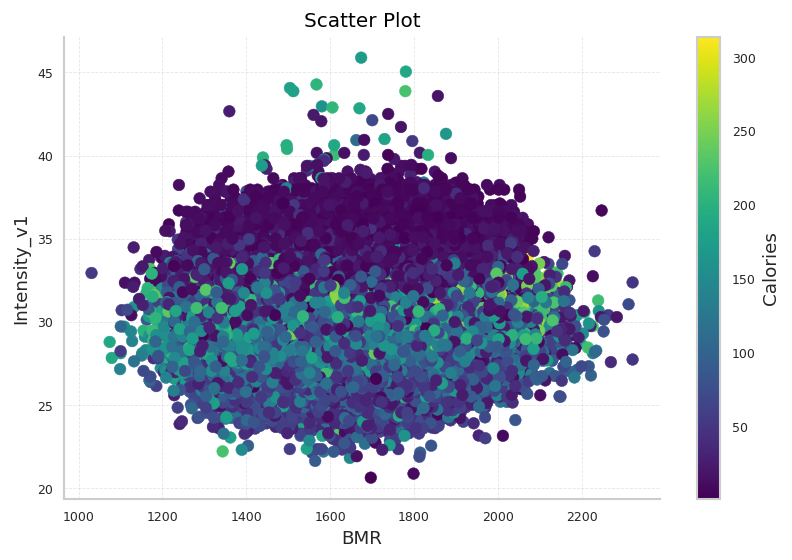

In [14]:
plot_scatter(train_new, x="BMR", y="Intensity_v1", color_feature="Calories")

In [ ]:
scaler = StandardScaler()

y = train_new["Calories"]
train_new = train_new.drop("Calories", axis=1)
test_new = test_new.drop("Calories", axis=1)

num_features = train_new.select_dtypes(exclude=['object', 'bool', 'int', 'category']).columns.tolist()

train_new[num_features] = scaler.fit_transform(train_new[num_features])
test_new[num_features] = scaler.transform(test_new[num_features])

train_new.head()

,Sex,Height,Weight,Heart_Rate,Body_Temp,BMI,Intensity,Heart_Duration,Weight_Duration_Heart,Outliers_Duration_Heart_Temp,BMI_Age,Age_Group
0,1,1.113015,0.489702,0.583480,1.236062,-0.938031,1.183180,-0.952799,1.338352,0,0.899410,3
1,0,-0.909676,-1.081265,-1.109199,-0.430898,-1.184666,-0.923712,0.431582,-1.004625,0,-0.783423,6
2,0,-1.065268,-0.795635,-1.214992,-0.302671,0.209075,-1.017567,0.610071,-1.047153,0,-0.920441,5
3,1,1.346402,1.060962,1.006650,0.851379,0.026339,1.161541,-0.852901,1.619162,0,0.610264,1
4,0,-0.676289,-1.009858,0.689273,0.723151,-1.479569,1.075158,-0.890178,0.535818,0,0.794743,3


In [ ]:
y.head()

,Calories
0,150.0
1,34.0
2,29.0
3,140.0
4,146.0


In [ ]:
test_new.head()

,Sex,Height,Weight,Heart_Rate,Body_Temp,BMI,Intensity,Heart_Duration,Weight_Duration_Heart,Outliers_Duration_Heart_Temp,BMI_Age,Age_Group
750000,1,0.179465,0.418294,-0.897614,-0.302671,0.978939,-0.995739,0.661858,-0.890129,0,-0.910919,4
750001,1,1.968769,1.560816,0.583480,0.594924,-0.082149,0.507888,-0.611173,1.078027,0,0.200535,2
750002,0,1.035219,0.703924,0.689273,0.466696,-0.214836,0.093216,-0.294981,0.309886,0,-0.106216,2
750003,0,-0.209514,-0.152967,1.218235,0.723151,0.199218,0.640408,-0.533902,0.544812,0,0.579460,3
750004,0,-0.131718,-0.581412,-0.157067,0.594924,-1.314534,-0.037914,-0.407071,-0.199594,0,-0.269589,2


## BASELINE MODELS:

In [ ]:
df_train_01 = train_new.copy()
df_y_01 = y.copy()
df_test_01 = test_new.copy()

df_train_01["Calories"]=df_y_01
df_train_01.head()

df_train_01.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/df_train_01.csv")
df_test_01.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/df_test_01.csv")

df_train_01 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/df_train_01.csv",index_col=0)
df_test_01 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/df_test_01.csv",index_col=0)

df_y_01 = df_train_01["Calories"]
df_train_01 = df_train_01.drop(columns="Calories")

In [ ]:
df_train_01.info(),df_test_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765000 entries, 0 to 1014999
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Sex                           765000 non-null  int64  
 1   Height                        765000 non-null  float64
 2   Weight                        765000 non-null  float64
 3   Heart_Rate                    765000 non-null  float64
 4   Body_Temp                     765000 non-null  float64
 5   BMI                           765000 non-null  float64
 6   Intensity                     765000 non-null  float64
 7   Heart_Duration                765000 non-null  float64
 8   Weight_Duration_Heart         765000 non-null  float64
 9   Outliers_Duration_Heart_Temp  765000 non-null  int64  
 10  BMI_Age                       765000 non-null  float64
 11  Age_Group                     765000 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 75.9 MB
<c

(None, None)

In [ ]:
df_test_01.head()

,Sex,Height,Weight,Heart_Rate,Body_Temp,BMI,Intensity,Heart_Duration,Weight_Duration_Heart,Outliers_Duration_Heart_Temp,BMI_Age,Age_Group
750000,1,0.179465,0.418294,-0.897614,-0.302671,0.978939,-0.995739,0.661858,-0.890129,0,-0.910919,4
750001,1,1.968769,1.560816,0.583480,0.594924,-0.082149,0.507888,-0.611173,1.078027,0,0.200535,2
750002,0,1.035219,0.703924,0.689273,0.466696,-0.214836,0.093216,-0.294981,0.309886,0,-0.106216,2
750003,0,-0.209514,-0.152967,1.218235,0.723151,0.199218,0.640408,-0.533902,0.544812,0,0.579460,3
750004,0,-0.131718,-0.581412,-0.157067,0.594924,-1.314534,-0.037914,-0.407071,-0.199594,0,-0.269589,2


In [ ]:
cat_features = df_train_01.select_dtypes(include=['object', 'bool', 'int', 'category']).columns.tolist()
num_features = df_train_01.select_dtypes(exclude=['object', 'bool', 'int', 'category']).columns.tolist()

cat_features,num_features

(['Sex', 'Outliers_Duration_Heart_Temp', 'Age_Group'],
 ['Height',
  'Weight',
  'Heart_Rate',
  'Body_Temp',
  'BMI',
  'Intensity',
  'Heart_Duration',
  'Weight_Duration_Heart',
  'BMI_Age'])

In [ ]:
df_train_01[cat_features] = df_train_01[cat_features].astype('category')
df_test_01[cat_features] = df_test_01[cat_features].astype('category')

In [ ]:
gc.collect()

3061

In [ ]:
df_subm = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/sample_submission.csv", index_col=0)
df_subm.head()

,Calories
id,
750000,88.283
750001,88.283
750002,88.283
750003,88.283
750004,88.283


### **1.0 Stacked Model**

In [ ]:
# Meta-learner
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define a common random seed for reproducibility
RANDOM_SEED = 42
N_ESTIMATORS = 2500  # Number of estimators for the ensemble models

X = df_train_01.copy()
y = df_y_01.copy()
y = np.log(y)

X_test = df_test_01.copy()

df_subm_stack = df_subm.copy()

cv = KFold(5, shuffle=True, random_state=RANDOM_SEED)
rmse = []

# Initialize the Stack
df_subm_stack['Calories'] = 0.0

i=0

oof_results_stack = pd.DataFrame(columns=list(range(5)), index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]

    # Define base estimators with random seed and number of estimators
    estimators = [
        ('lgbm', LGBMRegressor(random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS,subsample=0.9, colsample_bytree=0.95, learning_rate=0.015)),
        ('xgb', XGBRegressor(objective='reg:squarederror',random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS, colsample_bytree = 0.95, subsample= 0.90, learning_rate=0.015,enable_categorical=True, tree_method='gpu_hist')),
        ('catboost', CatBoostRegressor(objective="RMSE",random_seed=RANDOM_SEED, iterations=N_ESTIMATORS, bootstrap_type='Bernoulli', subsample=0.9, learning_rate=0.015,cat_features=cat_features,task_type='GPU'))
    ]

    meta_model = Ridge(alpha=0.1, positive=True)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)
    if i >= 0:
        #print(stacking_model.get_params())
        # Fit the StackingRegressor
        stacking_model.fit(X_train, y_train)
        obj = sio.dump(stacking_model, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S5E5/staked_base_{i}_02.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S5E5/staked_base_{i}_02.skops")
        stacking_model = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S5E5/staked_base_{i}_02.skops", trusted=unknown_types)


    stack_preds = stacking_model.predict(X_valid)

    oof_results_stack.iloc[idx_valid,i] = stack_preds.flatten()
    # Prepare the test data and make predictions
    error = root_mean_squared_error(y_valid, stack_preds)

    rmse.append(error)
    print(f"RMSE fold {i}: {error}")

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    df_subm_stack['Calories'] += stacking_model.predict(X_test) / 5
    i += 1

Streaming output truncated to the last 5000 lines.
2:	learn: 0.9607061	total: 29.6ms	remaining: 24.6s
3:	learn: 0.9471670	total: 39.7ms	remaining: 24.8s
4:	learn: 0.9338196	total: 49.7ms	remaining: 24.8s
5:	learn: 0.9206989	total: 59.7ms	remaining: 24.8s
6:	learn: 0.9077304	total: 69.6ms	remaining: 24.8s
7:	learn: 0.8949728	total: 79.1ms	remaining: 24.6s
8:	learn: 0.8823979	total: 89ms	remaining: 24.6s
9:	learn: 0.8700496	total: 99ms	remaining: 24.6s
10:	learn: 0.8579007	total: 109ms	remaining: 24.6s
11:	learn: 0.8458888	total: 118ms	remaining: 24.5s
12:	learn: 0.8340933	total: 129ms	remaining: 24.6s
13:	learn: 0.8224191	total: 138ms	remaining: 24.6s
14:	learn: 0.8109499	total: 148ms	remaining: 24.5s
15:	learn: 0.7996935	total: 158ms	remaining: 24.5s
16:	learn: 0.7885345	total: 168ms	remaining: 24.5s
17:	learn: 0.7775658	total: 178ms	remaining: 24.5s
18:	learn: 0.7667352	total: 187ms	remaining: 24.5s
19:	learn: 0.7560543	total: 197ms	remaining: 24.5s
20:	learn: 0.7455862	total: 207ms	r

In [ ]:
df_subm_stack.head()

,Calories
id,
750000,3.311340
750001,4.679823
750002,4.469765
750003,4.841780
750004,4.339122


(array([  105.,   134.,   501.,  1168.,  2228.,  1763.,  4256.,  5497.,
         7226.,  8829., 11297., 13637., 15834., 20521., 25590., 27663.,
        32951., 36207., 29934.,  4659.]),
 array([2.35741774e-03, 2.86770113e-01, 5.71182809e-01, 8.55595504e-01,
        1.14000820e+00, 1.42442090e+00, 1.70883359e+00, 1.99324629e+00,
        2.27765898e+00, 2.56207168e+00, 2.84648437e+00, 3.13089707e+00,
        3.41530976e+00, 3.69972246e+00, 3.98413515e+00, 4.26854785e+00,
        4.55296055e+00, 4.83737324e+00, 5.12178594e+00, 5.40619863e+00,
        5.69061133e+00]),
 <BarContainer object of 20 artists>)

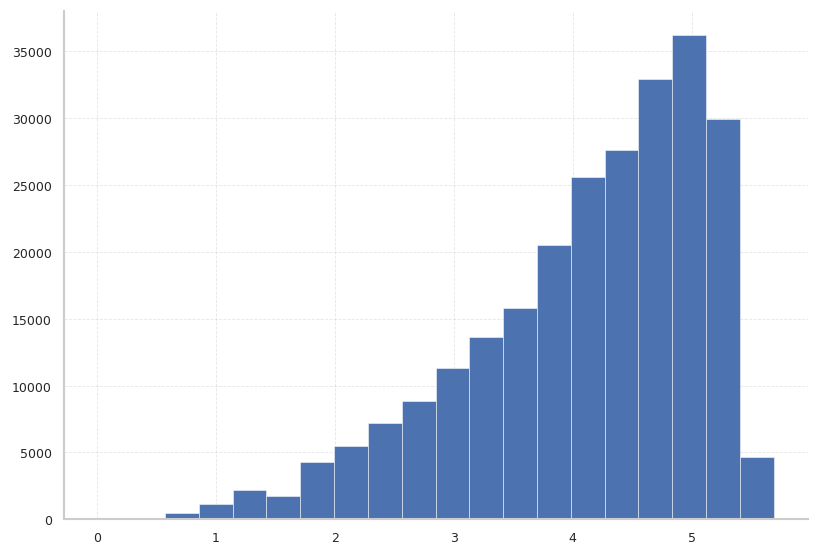

In [ ]:
plt.hist(x=df_subm_stack, bins=20)

In [ ]:
df_subm_stack_level=np.exp(df_subm_stack)
df_subm_stack_level

,Calories
id,
750000,27.421849
750001,107.750972
750002,87.336219
750003,126.694676
750004,76.640246
...,...
999995,26.295372
999996,9.421854
999997,72.393538


(array([2.8816e+04, 2.7968e+04, 2.3383e+04, 2.2317e+04, 2.0492e+04,
        1.7106e+04, 1.6606e+04, 1.6254e+04, 1.3049e+04, 1.3339e+04,
        1.2624e+04, 1.1327e+04, 9.9760e+03, 7.4000e+03, 4.5830e+03,
        2.4890e+03, 1.3580e+03, 7.5400e+02, 1.4100e+02, 1.8000e+01]),
 array([  1.0023602 ,  15.75597038,  30.50958056,  45.26319075,
         60.01680093,  74.77041111,  89.52402129, 104.27763147,
        119.03124166, 133.78485184, 148.53846202, 163.2920722 ,
        178.04568238, 192.79929257, 207.55290275, 222.30651293,
        237.06012311, 251.81373329, 266.56734348, 281.32095366,
        296.07456384]),
 <BarContainer object of 20 artists>)

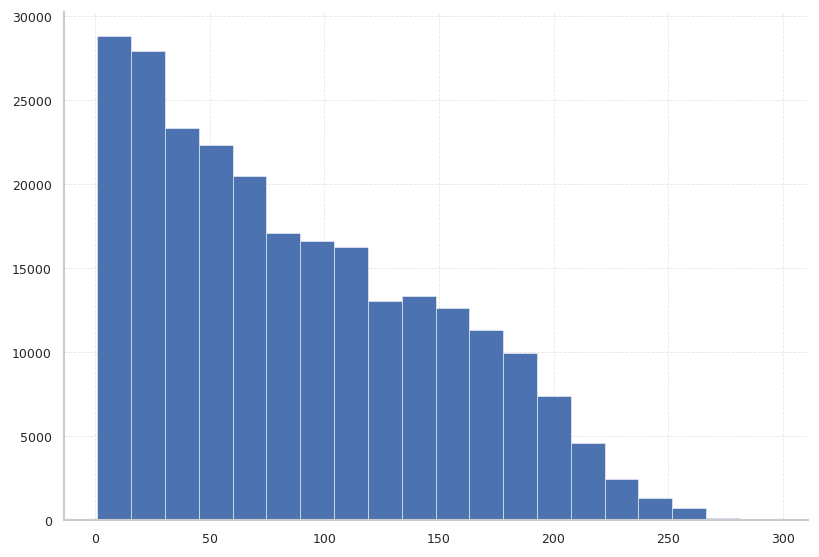

In [ ]:
plt.hist(x=df_subm_stack_level, bins=20)

(array([9.1686e+04, 9.1881e+04, 7.1955e+04, 7.3342e+04, 6.3622e+04,
        5.3327e+04, 5.4872e+04, 4.7743e+04, 4.1622e+04, 4.3544e+04,
        3.8679e+04, 3.3181e+04, 2.6776e+04, 1.6624e+04, 8.0060e+03,
        5.0810e+03, 2.3960e+03, 4.4100e+02, 1.6200e+02, 6.0000e+01]),
 array([  1.  ,  16.65,  32.3 ,  47.95,  63.6 ,  79.25,  94.9 , 110.55,
        126.2 , 141.85, 157.5 , 173.15, 188.8 , 204.45, 220.1 , 235.75,
        251.4 , 267.05, 282.7 , 298.35, 314.  ]),
 <BarContainer object of 20 artists>)

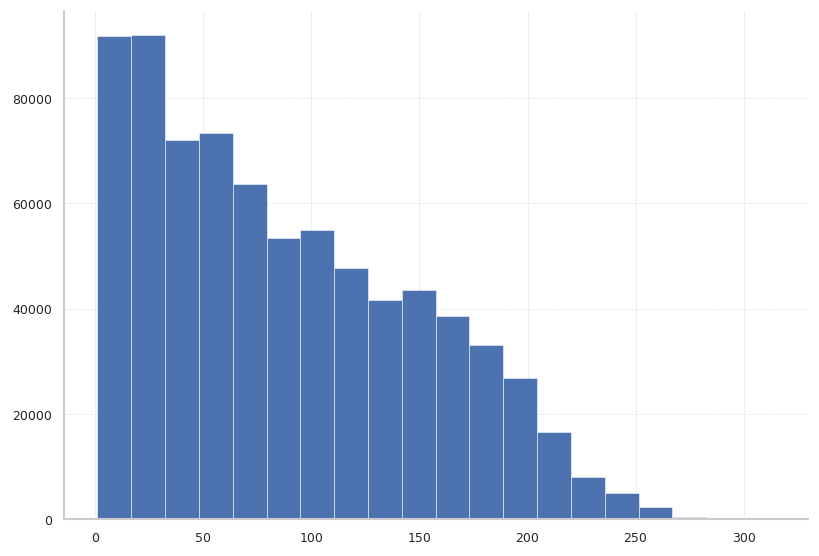

In [ ]:
plt.hist(x=df_y_01, bins=20)

In [ ]:
oof_results_stack_level = np.exp(oof_results_stack.astype(float).mean(axis=1))

In [ ]:
df_subm_stack_level.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/stacking_baseline_00.csv")
oof_results_stack_level.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E5/oof_results_stack_baseline_00.csv")

In [ ]:
df_subm_stack_level

,Calories
id,
750000,27.421849
750001,107.750972
750002,87.336219
750003,126.694676
750004,76.640246
...,...
999995,26.295372
999996,9.421854
999997,72.393538


In [ ]:
oof_results_stack_level

,0
0,146.539897
1,35.909514
2,28.852874
3,137.603056
4,145.638893
...,...
1014995,45.108408
1014996,22.781587
1014997,74.574847
1014998,9.726288


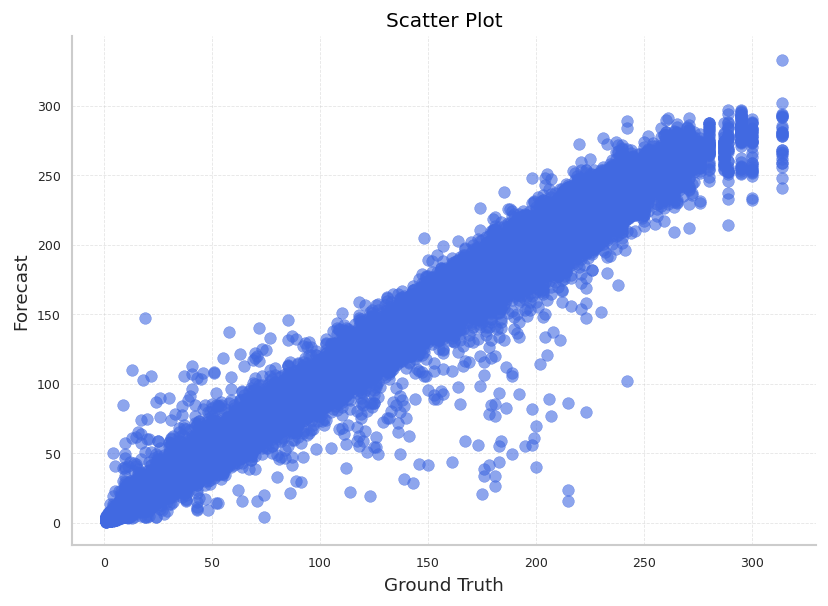

In [ ]:
plt.scatter(df_y_01, oof_results_stack_level, color="royalblue",alpha=0.6)

plt.xlabel("Ground Truth")
plt.ylabel("Forecast")
plt.title("Scatter Plot")  # Add a title for better visualization
plt.show()

In [ ]:
root_mean_squared_log_error(df_y_01.values, oof_results_stack_level.values)

0.05994851756036422

(array([  105.,   134.,   501.,  1168.,  2228.,  1763.,  4256.,  5497.,
         7226.,  8829., 11297., 13637., 15834., 20521., 25590., 27663.,
        32951., 36207., 29934.,  4659.]),
 array([2.35741774e-03, 2.86770113e-01, 5.71182809e-01, 8.55595504e-01,
        1.14000820e+00, 1.42442090e+00, 1.70883359e+00, 1.99324629e+00,
        2.27765898e+00, 2.56207168e+00, 2.84648437e+00, 3.13089707e+00,
        3.41530976e+00, 3.69972246e+00, 3.98413515e+00, 4.26854785e+00,
        4.55296055e+00, 4.83737324e+00, 5.12178594e+00, 5.40619863e+00,
        5.69061133e+00]),
 <BarContainer object of 20 artists>)

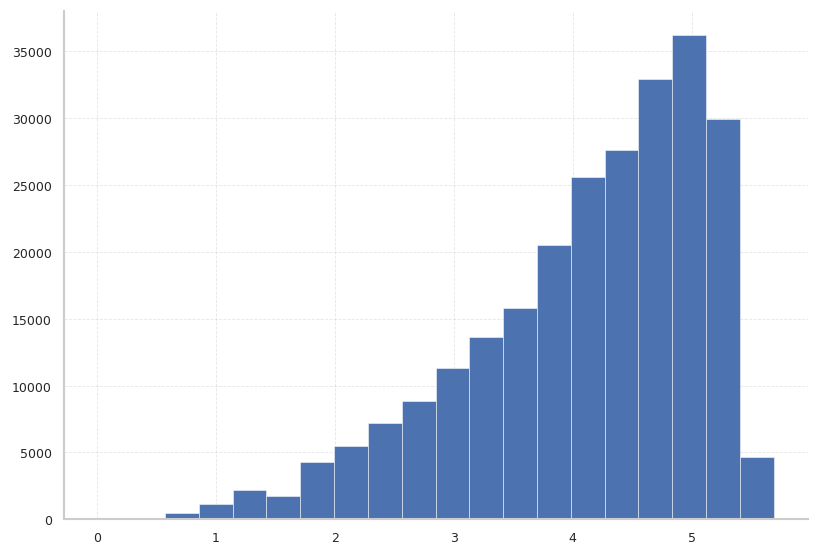

In [ ]:
plt.hist(x=df_subm_stack, bins=20)